## Bike Sharing

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

BoomBikes want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
rides = pd.read_csv("day.csv")
rides.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
# Check if we have any null values
rides.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [34]:
# verify the data types
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [35]:
# Describe the numeric values
rides.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [36]:
# Convert the weather  situation to be a string rather than numeric code
weather_map = {1: "Clear", 2:"Mist", 3:"LightRain", 4:"HeavyRain"}
rides['weathersit'] = rides.weathersit.apply(lambda x: weather_map.get(x))
rides.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,Mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,Mist,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [37]:
# convert the yr to actual year number to be clear while performing analysis
# rides['yr'] = rides.yr.apply(lambda x: 2018 if x == 0 else 2019)
# rides.head()

# -- Decided not to do this as it creates issue with scale.

In [38]:
# convert seasons to be actual string values
season_map = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
rides['season'] = rides.season.apply(lambda x: season_map.get(x))
rides.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [39]:
# The instant feature does not seem to add any value, lets drop it
rides.drop(['instant'], axis=1, inplace=True)
rides.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [40]:
# Extract the day of the month from the date.
rides['day'] = pd.to_datetime(rides['dteday']).dt.day
# drop the dteday column
rides.drop(['dteday'], axis=1, inplace=True)

In [41]:
rides.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


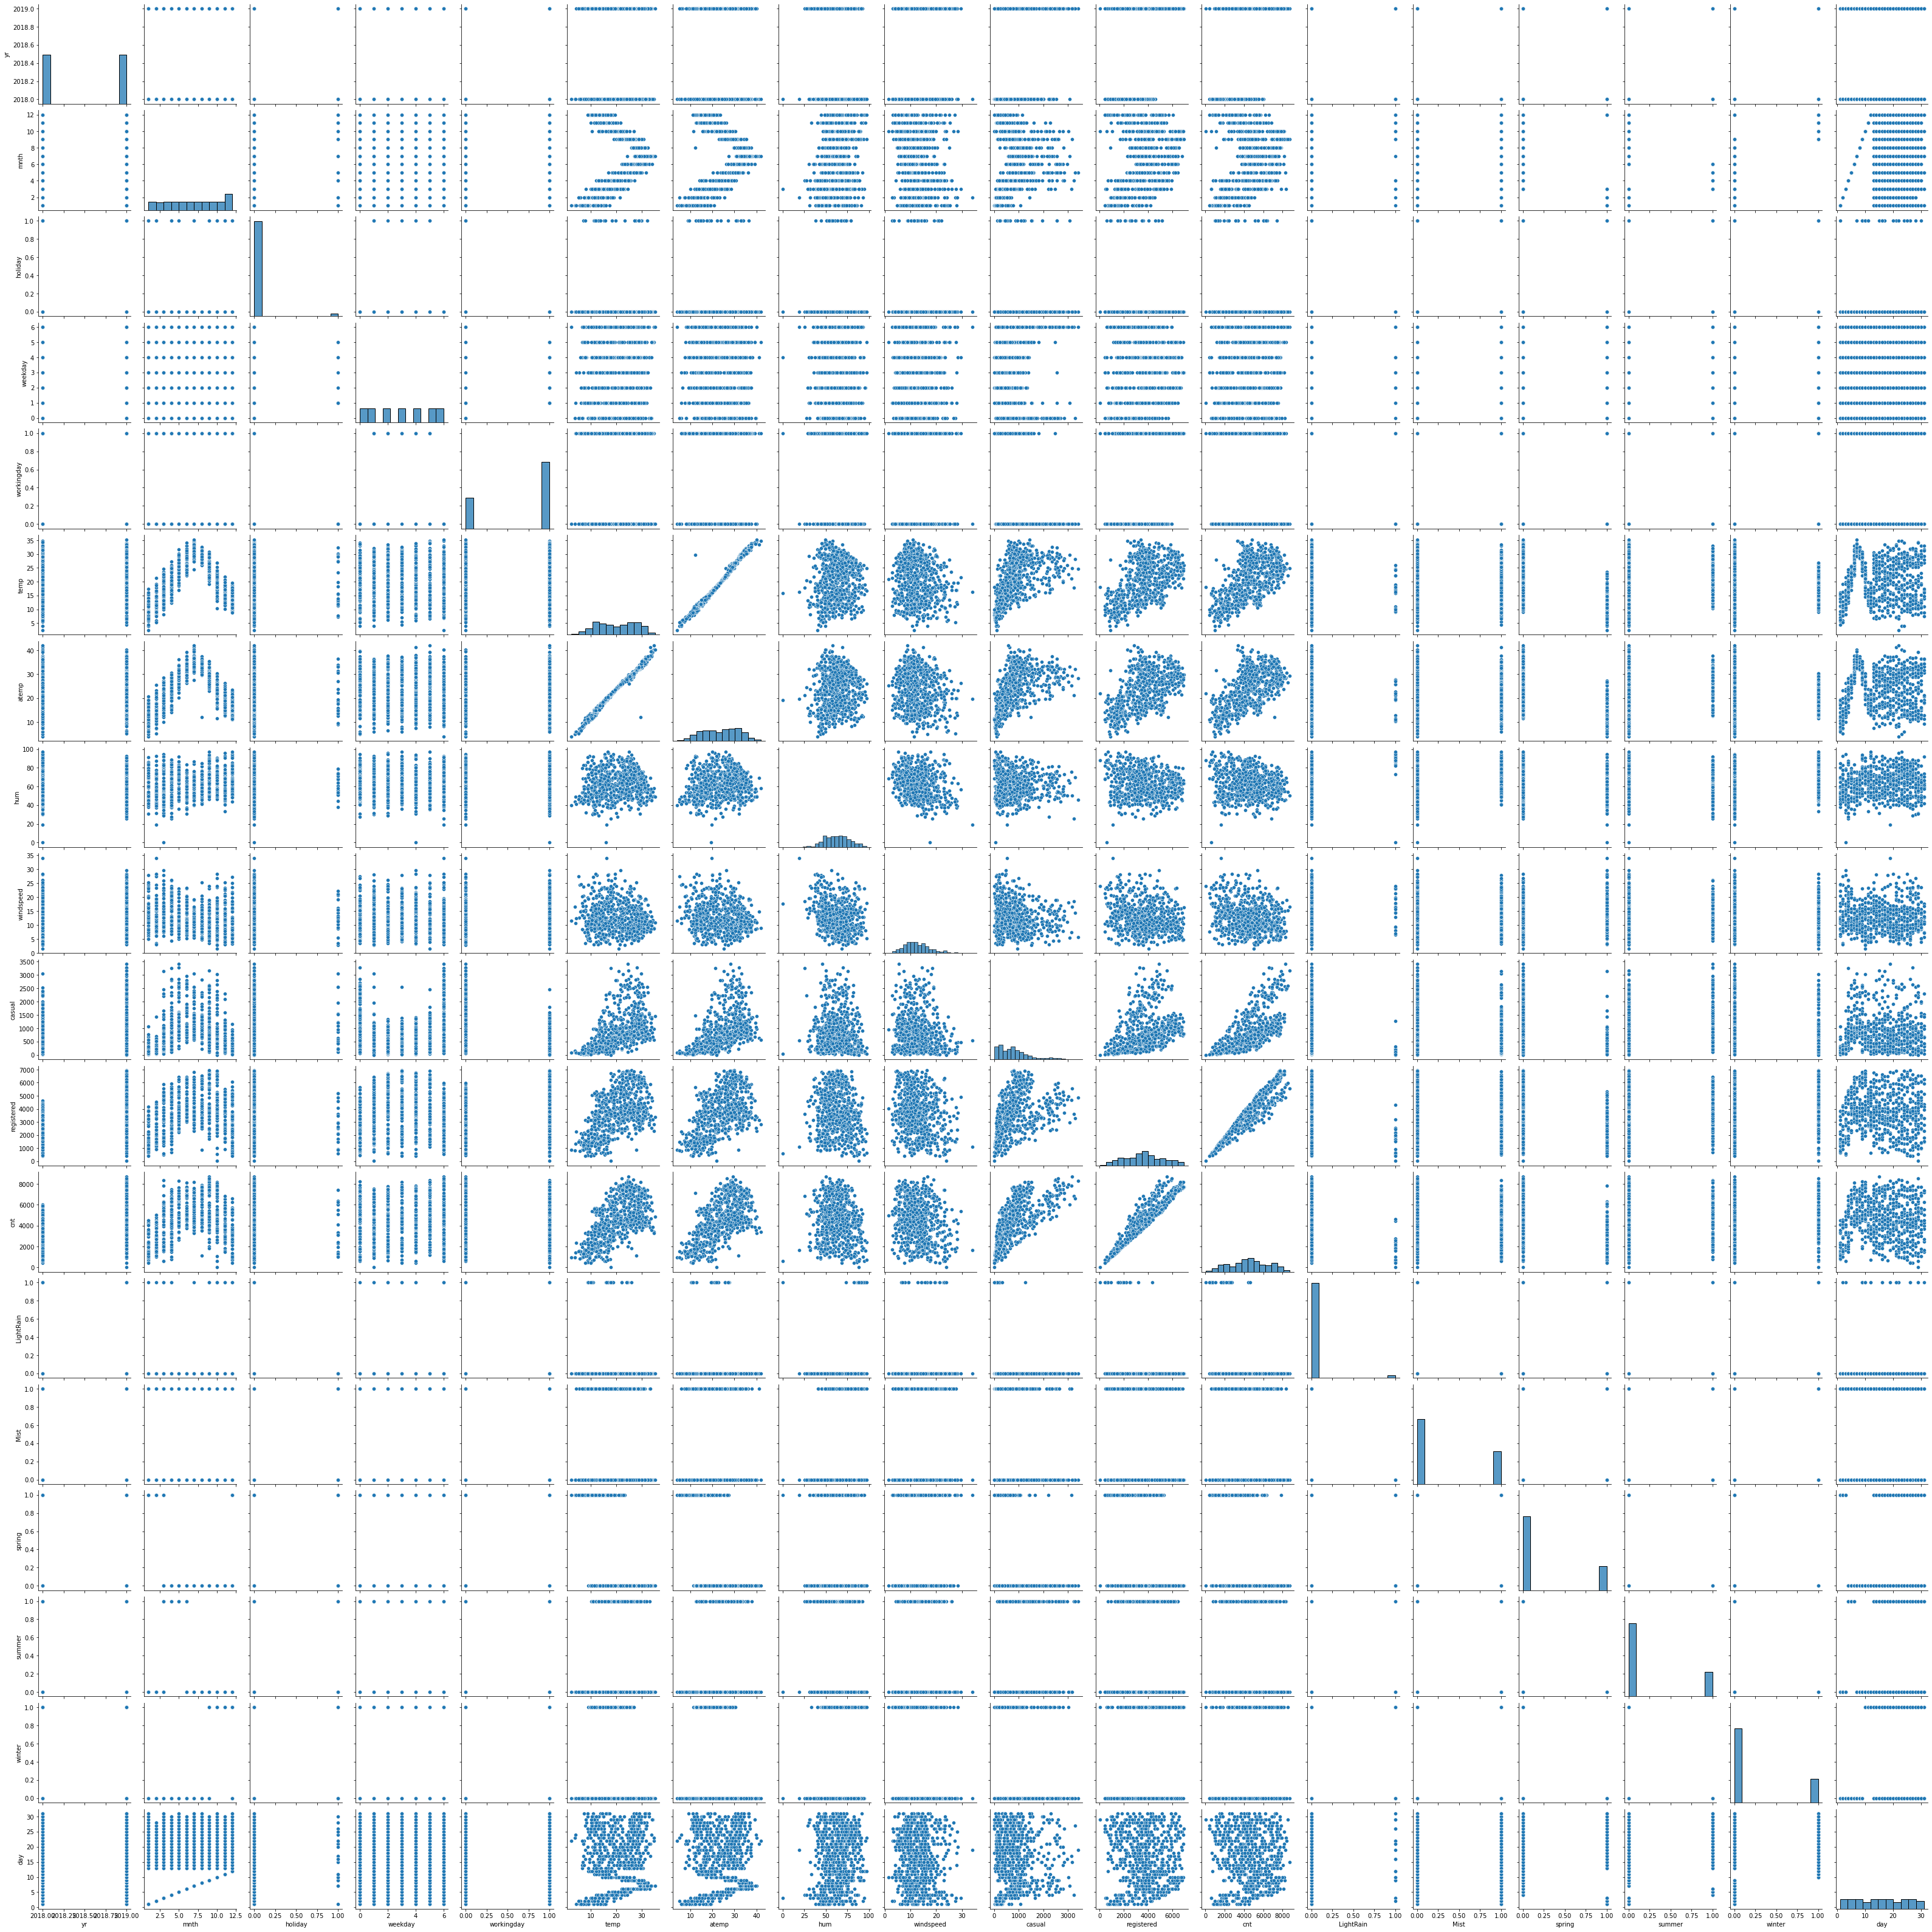

In [25]:
sns.pairplot(rides)
plt.show()

In [42]:
# Dummy valiable for weathersit
weather_situation = pd.get_dummies(rides['weathersit'], drop_first = True)
rides = pd.concat([rides, weather_situation], axis=1)
rides.drop(['weathersit'], axis = 1, inplace = True)
rides.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,LightRain,Mist
0,spring,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1
1,spring,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1
2,spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,spring,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,spring,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [43]:
# Dummy valiable for season
season_dummy = pd.get_dummies(rides['season'], drop_first = True)
rides = pd.concat([rides, season_dummy], axis=1)
rides.drop(['season'], axis = 1, inplace = True)
rides.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,LightRain,Mist,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [44]:
# use sklearn to spli data
from sklearn.model_selection import train_test_split

np.random.seed(0)
rides_train, rides_test = train_test_split(rides, train_size=0.7, random_state=100)

#### Rescale the features using MinMaxScaler

In [45]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

In [46]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
vars_to_scale = ["mnth", "weekday", "temp", "atemp", "hum", 'windspeed', "casual", "registered", "cnt", "day"]
rides_train[vars_to_scale] = scalar.fit_transform(rides_train[vars_to_scale])

In [47]:
rides_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,LightRain,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,0.487712,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,0.295091,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.733333,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


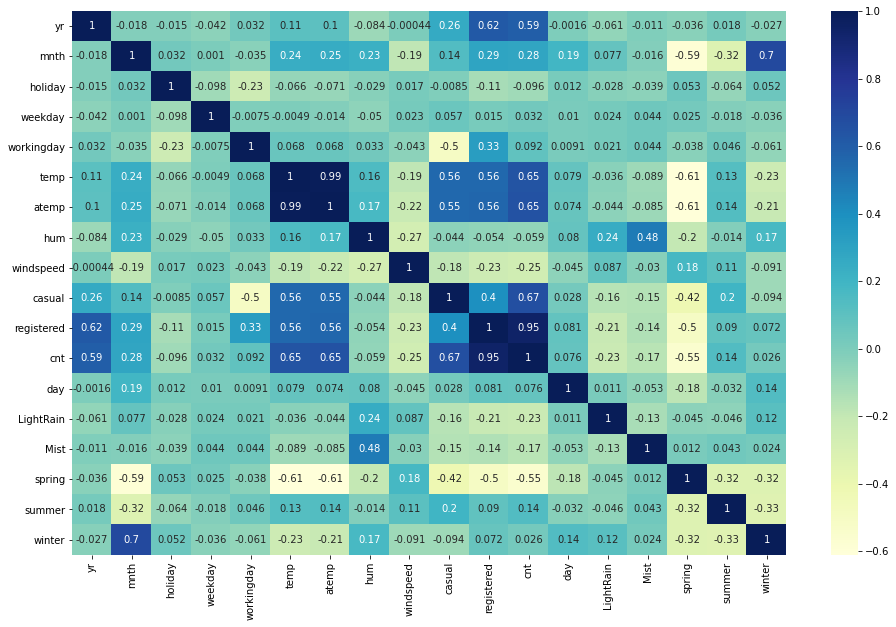

In [48]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16,10))
sns.heatmap(rides_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [49]:
# split y train and X train
y_train = rides_train.pop('cnt')
X_train = rides_train

In [57]:
# drop temp as it is highly correlated to atemp (0.99 - almost 1)
X_train.drop(['temp'], axis=1, inplace=True)

### Building a linear model

In [50]:
# Using sklearn RFE to build a model.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# Select top 12 for RFE and see to selected features
rfe = RFE(lm, 12)
rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', False, 5),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('day', True, 1),
 ('LightRain', True, 1),
 ('Mist', False, 3),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [60]:
# yr seems to be the last  one, but there is correlation between yr and cnt.
# Lets include all
X_train_rfe = X_train[X_train.columns]
X_train_rfe.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,casual,registered,day,LightRain,Mist,spring,summer,winter
576,1,0.545455,0,0.333333,1,0.766351,0.725633,0.264686,0.294422,0.899220,1.000000,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.438975,0.640189,0.255342,0.290765,0.446145,0.066667,0,1,1,0,0
728,1,1.000000,0,0.000000,0,0.200348,0.498067,0.663106,0.110332,0.203869,0.966667,0,0,1,0,0
482,1,0.272727,0,1.000000,0,0.391735,0.504508,0.188475,0.340750,0.444701,0.900000,0,1,0,1,0
111,0,0.272727,0,0.833333,1,0.318819,0.751824,0.380981,0.053337,0.214554,0.700000,0,1,0,1,0


In [61]:
# Check the model using statsmodel
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.048e+29
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:07:57   Log-Likelihood:                 16375.
No. Observations:                 510   AIC:                        -3.272e+04
Df Residuals:                     493   BIC:                        -3.264e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.384e-16   1.22e-15      0.523      0.602   -1.76e-15    3.04e-15
yr          4.094e-16   4.28e-16      0.956      0.339   -4.32e-16    1.25e-15
mnth        4.753e-16   7.79e-16      0.610      0.542   -1.06e-15    2.01e-15
holiday             0   8.28e-16          0      1.000   -1.63e-15    1.63e-15
weekday     3.747e-16   3.81e-16      0.984      0.326   -3.73e-16    1.12e-15
workingday  5.551e-16   4.92e-16      1.129      0.259   -4.11e-16    1.52e-15
atemp       7.216e-16   1.25e-15      0.579      0.563   -1.73e-15    3.17e-15
hum         5.967e-16   1.19e-15      0.502      0.616   -1.74e-15    2.93e-15
windspeed  -8.674e-17   8.28e-16     -0.105      0.917   -1.71e-15    1.54e-15
casual         0.3775    1.2e-15   3.16e+14      0.000       0.377       0.377
registered     0.7968   1.43e-15   5.57e+14      0.000       0.797       0.797
day        -7.633e-17   4.33e-16     -0.176      0.860   -9.27e-16    7.75e-16
LightRain   7.633e-17   8.91e-16      0.086      0.932   -1.68e-15    1.83e-15
Mist        1.908e-16   3.38e-16      0.564      0.573   -4.74e-16    8.56e-16
spring       1.11e-16   6.82e-16      0.163      0.871   -1.23e-15    1.45e-15
summer      5.204e-17   4.58e-16      0.114      0.910   -8.48e-16    9.52e-16
winter              0   5.41e-16          0      1.000   -1.06e-15    1.06e-15
==============================================================================
Omnibus:                       15.291   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.912
Skew:                           0.415   Prob(JB):                     0.000350
Kurtosis:                       2.752   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Drop casual and registered as they seem to be directly linked.
X_train_rfe.drop("casual", axis=1, inplace=True)
X_train_rfe.drop("registered", axis=1, inplace=True)

In [63]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.88e-180
Time:                        21:11:58   Log-Likelihood:                 491.07
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     495   BIC:                            -888.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2611      0.039      6.675      0.000       0.184       0.338
yr             0.2336      0.008     27.644      0.000       0.217       0.250
mnth           0.0160      0.026      0.614      0.539      -0.035       0.067
holiday       -0.0602      0.027     -2.200      0.028      -0.114      -0.006
weekday        0.0506      0.013      4.027      0.000       0.026       0.075
workingday     0.0191      0.009      2.083      0.038       0.001       0.037
atemp          0.4901      0.035     13.885      0.000       0.421       0.559
hum           -0.1237      0.039     -3.133      0.002      -0.201      -0.046
windspeed     -0.1618      0.027     -6.041      0.000      -0.214      -0.109
day           -0.0098      0.015     -0.677      0.499      -0.038       0.019
LightRain     -0.2445      0.028     -8.869      0.000      -0.299      -0.190
Mist          -0.0583      0.011     -5.286      0.000      -0.080      -0.037
spring        -0.0907      0.022     -4.034      0.000      -0.135      -0.047
summer         0.0335      0.015      2.205      0.028       0.004       0.063
winter         0.0643      0.018      3.609      0.000       0.029       0.099
==============================================================================
Omnibus:                       72.524   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.208
Skew:                          -0.709   Prob(JB):                     3.02e-42
Kurtosis:                       5.643   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# month does not seem to effect much, let us drop it.
X_train_rfe.drop("mnth", axis=1, inplace=True)

In [67]:
X_train_rfe.shape

(510, 12)

In [65]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.49e-181
Time:                        21:13:23   Log-Likelihood:                 490.87
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     496   BIC:                            -894.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2685      0.037      7.227      0.000       0.196       0.342
yr             0.2334      0.008     27.658      0.000       0.217       0.250
holiday       -0.0596      0.027     -2.181      0.030      -0.113      -0.006
weekday        0.0510      0.013      4.071      0.000       0.026       0.076
workingday     0.0190      0.009      2.072      0.039       0.001       0.037
atemp          0.4911      0.035     13.935      0.000       0.422       0.560
hum           -0.1215      0.039     -3.092      0.002      -0.199      -0.044
windspeed     -0.1614      0.027     -6.032      0.000      -0.214      -0.109
day           -0.0095      0.014     -0.656      0.512      -0.038       0.019
LightRain     -0.2454      0.028     -8.921      0.000      -0.299      -0.191
Mist          -0.0586      0.011     -5.328      0.000      -0.080      -0.037
spring        -0.0972      0.020     -4.879      0.000      -0.136      -0.058
summer         0.0292      0.013      2.170      0.031       0.003       0.056
winter         0.0690      0.016      4.274      0.000       0.037       0.101
==============================================================================
Omnibus:                       73.160   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.631
Skew:                          -0.714   Prob(JB):                     8.98e-43
Kurtosis:                       5.659   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# day does not seem to effect much, let us drop it.
X_train_rfe.drop("day", axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.13e-182
Time:                        21:14:04   Log-Likelihood:                 490.65
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     497   BIC:                            -900.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2642      0.037      7.228      0.000       0.192       0.336
yr             0.2333      0.008     27.669      0.000       0.217       0.250
holiday       -0.0599      0.027     -2.193      0.029      -0.114      -0.006
weekday        0.0508      0.013      4.056      0.000       0.026       0.075
workingday     0.0189      0.009      2.062      0.040       0.001       0.037
atemp          0.4925      0.035     14.006      0.000       0.423       0.562
hum           -0.1239      0.039     -3.169      0.002      -0.201      -0.047
windspeed     -0.1619      0.027     -6.053      0.000      -0.214      -0.109
LightRain     -0.2444      0.027     -8.904      0.000      -0.298      -0.191
Mist          -0.0579      0.011     -5.292      0.000      -0.079      -0.036
spring        -0.0954      0.020     -4.837      0.000      -0.134      -0.057
summer         0.0299      0.013      2.228      0.026       0.004       0.056
winter         0.0690      0.016      4.281      0.000       0.037       0.101
==============================================================================
Omnibus:                       74.941   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.719
Skew:                          -0.730   Prob(JB):                     7.06e-44
Kurtosis:                       5.687   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# All P values are below 0.05 and R-squared is 0.83 (which is high enough)
# Even adjusted R squared is 0.826

# Let us calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,hum,27.00
4,atemp,15.23
6,windspeed,4.56
9,spring,3.67
3,workingday,3.19
2,weekday,3.09
11,winter,2.90
8,Mist,2.28
10,summer,2.20
0,yr,2.07


In [70]:
# We want VIF to be below 5, hence let us drop hum and atemp one at a time.
X_train_rfe.drop("hum", axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.7
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.00e-181
Time:                        21:27:15   Log-Likelihood:                 485.55
No. Observations:                 510   AIC:                            -947.1
Df Residuals:                     498   BIC:                            -896.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1991      0.031      6.527      0.000       0.139       0.259
yr             0.2364      0.008     27.958      0.000       0.220       0.253
holiday       -0.0601      0.028     -2.182      0.030      -0.114      -0.006
weekday        0.0545      0.013      4.331      0.000       0.030       0.079
workingday     0.0193      0.009      2.085      0.038       0.001       0.037
atemp          0.4654      0.034     13.523      0.000       0.398       0.533
windspeed     -0.1380      0.026     -5.330      0.000      -0.189      -0.087
LightRain     -0.2792      0.025    -10.994      0.000      -0.329      -0.229
Mist          -0.0781      0.009     -8.708      0.000      -0.096      -0.060
spring        -0.1016      0.020     -5.127      0.000      -0.141      -0.063
summer         0.0262      0.013      1.948      0.052      -0.000       0.053
winter         0.0589      0.016      3.696      0.000       0.028       0.090
==============================================================================
Omnibus:                       73.337   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.844
Skew:                          -0.730   Prob(JB):                     4.41e-41
Kurtosis:                       5.572   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Calculate vif again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,atemp,5.17
5,windspeed,4.54
3,workingday,3.15
2,weekday,3.08
8,spring,2.23
0,yr,2.06
9,summer,1.86
10,winter,1.73
7,Mist,1.55
1,holiday,1.09


In [72]:
# Though atemp vif is above 5, since the P value is 0 and it is highly correlated, let us keep it.

# Run the residual and try y pred
y_train_pred = lm.predict(X_train_sm)
y_train_pred.head()

576    0.793027
426    0.479299
728    0.335589
482    0.594358
111    0.307688
dtype: float64

<AxesSubplot:ylabel='Density'>

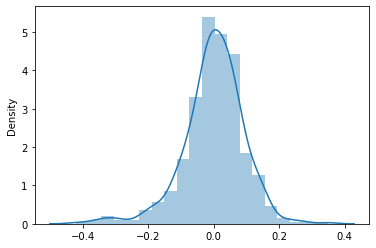

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(y_train - y_train_pred, bins=20)

In [76]:
# scale the test features too using the same vars_to_scale array

rides_test[vars_to_scale] = scalar.fit_transform(rides_test[vars_to_scale])

# Adding constant variable to test dataframe
y_test = rides_test.pop('cnt')
X_test = rides_test
X_test_new = sm.add_constant(X_test)

rides_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,day,LightRain,Mist,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.502273,0.700000,0.546074,0.530791,0.508362,0.418803,0.254977,0.507234,0.497576,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.311120,0.187620,0.330843,0.459303,0.248645,0.227648,0.200875,0.187683,0.209104,0.236879,0.290024,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.329310,0.333953,0.361079,0.284201,0.096810,0.323729,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.545492,0.543153,0.491299,0.403318,0.215231,0.505614,0.483333,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.756414,0.719758,0.650989,0.523975,0.346957,0.656308,0.766667,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
# drop the same columns that were dropped from train dataframe
X_test_new.drop(['temp', 'casual', 'registered', 'mnth', 'day', 'hum'], axis=1, inplace=True)
y_test_pred = lm.predict(X_test_new)

In [79]:
y_test_pred.head()

184    0.411736
535    0.874293
299    0.403468
221    0.558495
152    0.535440
dtype: float64

Text(0, 0.5, 'Y Test')

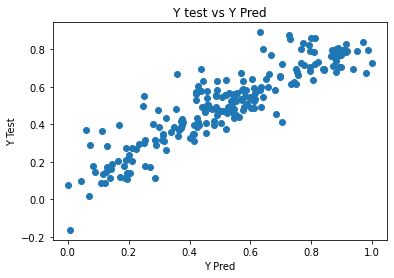

In [80]:
# plot a scatter plot to verify
plt.scatter(y_test, y_test_pred)
plt.title("Y test vs Y Pred")
plt.xlabel("Y Pred")
plt.ylabel("Y Test")

## Looking at the above scatter plot, the model seems to be predicting very well.

In [81]:
# Check r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7991670245354197

### The r-squared score is nearly 0.8, which is high enough to trust the model is working fine.